# AB-Test

## Homework #17 by Glaktionova Natalia

AB Data Set

## Знакомство с данными

In [46]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [2]:
df = pd.read_csv('data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


In [57]:
df_sum = df.groupby(['landing_page']).converted.agg(['sum', 'count'])
df_sum

,sum,count
landing_page,,
new_page,17498,147239
old_page,17739,147239


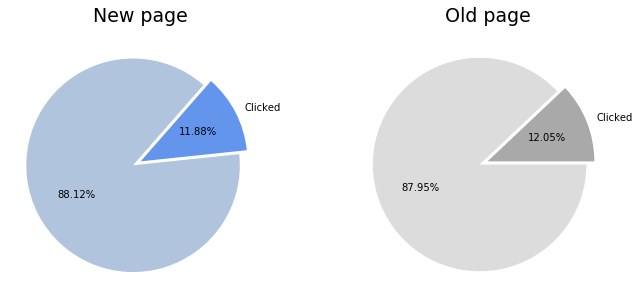

In [66]:
labels = ['Clicked', '']
new_page_clicks = [df_sum['sum'][0], df_sum['count'][0]-df_sum['sum'][0]]
old_page_clicks = [df_sum['sum'][1], df_sum['count'][1]-df_sum['sum'][1]]

fig, axs = plt.subplots(1, 2,figsize=(11, 6))
colors_op = ['darkgray','gainsboro']
colors_np = ['cornflowerblue','lightsteelblue']

axs[0].pie(new_page_clicks, labels=labels, autopct='%1.2f%%', shadow=False, colors=colors_np, explode = (0, 0.08)\
          , startangle = 6)
axs[0].set_title('New page', fontsize = 19)

axs[1].pie(old_page_clicks, labels=labels, autopct='%1.2f%%', shadow=False, colors=colors_op, explode = (0, 0.08))
axs[1].set_title('Old page', fontsize = 19)

plt.subplots_adjust(wspace=0.3, hspace=1)
plt.show()

In [8]:
df.converted.describe()

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

Видим, что практически нет разницы по среднему и дисперсии в разбивке по версиям страницы и среднему и дисперсии по всей выборке

In [13]:
df.groupby(['landing_page']).converted.agg(['mean', 'std'])

,mean,std
landing_page,,
new_page,0.118841,0.323602
old_page,0.120478,0.325520


Добавим разбивку на группы пользователей и снова нет ощутимой разницы

In [14]:
df.groupby(['landing_page','group']).converted.agg(['mean', 'std'])

mean       std
landing_page group                        
new_page     control    0.121369  0.326641
             treatment  0.118807  0.323563
old_page     control    0.120386  0.325414
             treatment  0.127226  0.333311

Разобъем датасет на группы и посчитаем статистики

In [34]:
test_data_A = df[df.landing_page == 'new_page'][['group','converted']]
test_data_B = df[df.landing_page == 'old_page'][['group','converted']]

Выдвигаем гипотезу, что разницы между версиями сайта нет. P-value значительно выше 0.05, следовательно мы не можем отвергнуть нашу гипотезу.

In [37]:
scipy.stats.ttest_ind(test_data_A.converted, test_data_B.converted, equal_var = False)

Ttest_indResult(statistic=-1.368333843398843, pvalue=0.17120864588916837)

Доверительные интервалы также практически не отличаются

In [64]:
print('95-Percent Confidence Interval for NEW page: Lower Bound = %.4f, Upper Bound = %.4f' % \
      (proportion_confint(sum(test_data_A.converted), test_data_A.shape[0], method = 'wilson'))) 

print('95-Percent Confidence Interval for OLD page: Lower Bound = %.4f, Upper Bound = %.4f' % \
      (proportion_confint(sum(test_data_B.converted), test_data_B.shape[0], method = 'wilson'))) 

95-Percent Confidence Interval for NEW page: Lower Bound = 0.1172, Upper Bound = 0.1205
95-Percent Confidence Interval for OLD page: Lower Bound = 0.1188, Upper Bound = 0.1222


Вывод: улучшения в новой landing page сайта нет